In [2]:
import pandas as pd
from functools import reduce  
import operator
import collections
import networkx as nx
from collections import Mapping

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  


In [3]:
df = pd.read_csv("categories.tsv", delimiter = "\t", names = ["0","1"] )
df = df[12:]
df = df["1"]

In [4]:
def getTree(dataDict, keyList):
    return reduce(operator.getitem, keyList, dataDict)

def setCategory(dataDict, keyList, category):
        if category not in getTree(dataDict, keyList[:-1])[keyList[-1]]:
            getTree(dataDict, keyList[:-1])[keyList[-1]].update({category:{}})

In [5]:
Hierarchy = {}
Hierarchy['subject'] = {}
def buildTree(categoriesData):
    for categories in categoriesData:
        categories = categories.replace("."," ")
        categories = categories.split()
        categories_merged = []
        for category in categories:
            if len(categories_merged):
                categories_merged.append(categories_merged[-1] + "." + category)
            else:
                categories_merged.append(category)
                
        keys = []
        for category in categories_merged:
            if(keys):
                setCategory(Hierarchy, keys, category)
            keys.append(category)


In [6]:
buildTree(df)

In [7]:
Hierarchy

{'subject': {'subject.History': {'subject.History.British_History': {'subject.History.British_History.British_History_1500_and_before_including_Roman_Britain': {},
    'subject.History.British_History.British_History_15001750': {},
    'subject.History.British_History.British_History_17501900': {},
    'subject.History.British_History.British_History_Post_1900': {}},
   'subject.History.General_history': {},
   'subject.History.Military_History_and_War': {},
   'subject.History.Recent_History': {},
   'subject.History.Ancient_History_Classical_History_and_Mythology': {},
   'subject.History.Pre_1900_Military': {},
   'subject.History.World_War_II': {},
   'subject.History.Archaeology': {},
   'subject.History.Historians_chroniclers_and_history_books': {},
   'subject.History.North_American_History': {}},
  'subject.People': {'subject.People.Historical_figures': {},
   'subject.People.Artists': {},
   'subject.People.Sports_and_games_people': {},
   'subject.People.Geographers_and_explo

### Iterate Dictionary

In [8]:
def categoriesAlphabetical(d):
    for k, v in d.items():
        if isinstance(v, dict):  
            v = dict(collections.OrderedDict(sorted(v.items())))
            categoriesAlphabetical(v)
            d[k] = v
            

In [9]:
categoriesAlphabetical(Hierarchy)

In [10]:
Hierarchy

{'subject': {'subject.Art': {'subject.Art.Art': {}, 'subject.Art.Artists': {}},
  'subject.Business_Studies': {'subject.Business_Studies.Business': {},
   'subject.Business_Studies.Companies': {},
   'subject.Business_Studies.Currency': {},
   'subject.Business_Studies.Economics': {}},
  'subject.Citizenship': {'subject.Citizenship.Animal_and_Human_Rights': {},
   'subject.Citizenship.Community_organisations': {},
   'subject.Citizenship.Conflict_and_Peace': {},
   'subject.Citizenship.Culture_and_Diversity': {},
   'subject.Citizenship.Education': {},
   'subject.Citizenship.Environment': {},
   'subject.Citizenship.Law': {},
   'subject.Citizenship.Media': {},
   'subject.Citizenship.Politics_and_government': {}},
  'subject.Countries': {},
  'subject.Design_and_Technology': {'subject.Design_and_Technology.Air_and_Sea_transport': {},
   'subject.Design_and_Technology.Architecture': {},
   'subject.Design_and_Technology.Engineering': {},
   'subject.Design_and_Technology.Railway_trans

In [11]:
def assignCategoryId(Hierarchy, G):
    c = 1
    categories_id = []
    q = list(Hierarchy.items())
    categories_id.append(('subject',"C"+"%04d"%c))
    while q:
        v, d = q.pop()
        for nv, nd in d.items():
            G.add_edge(v, nv)
            c = c + 1
            categories_id.append((nv,"C"+"%04d"%c))     
            if isinstance(nd, Mapping):
                q.append((nv,nd))
    return categories_id

In [12]:
G = nx.DiGraph()
categories_id = assignCategoryId(Hierarchy, G)

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


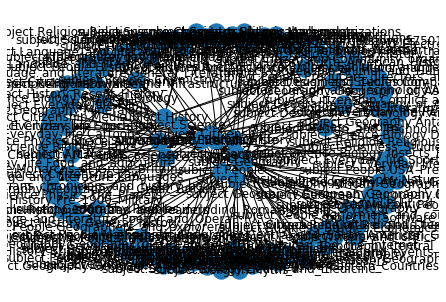

In [13]:
nx.draw(G, with_labels = True)

In [14]:
len(G.nodes())

146

In [15]:
df_categories = pd.DataFrame(categories_id)
df_categories.to_csv (r'category-ids.csv', header=False)